<a href="https://colab.research.google.com/github/RenoMorais/Project-Machine-Learning-Mobile-Price-to-Software-Engineer/blob/main/PRICEMOBILE_RENAN_MORAIS_FLORIAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *USER STORY:*

---






# UMA EMPRESA DE REVENDA DE CELULARES SOLICITOU UM NOVO MODELO PARA PRECIFICAR SEUS APARELHOS.

# A EMPRESA BUSCA UM MODELO QUE POSSA MOSTRAR A CADA TREINAMENTO QUAL A CARACTERÍSTICA DOS CELULARES QUE INFLUENCIAM MAIS NO PREÇO MÉDIO DOS APARELHOS. COM ISSO A EMPRESA CONSEGUIRIA FOCAR SUAS COMPRAS EM APARELHOS COM ESSAS CARACTERÍSTICAS MAIS RELEVANTES DO MODELO, AUMENTANDO SEU LUCRO NA PRÓPRIA REVENDA.

# É IMPORTANTE QUE O MODELO TENHA ACURÁCIA DE NO MÍNIMO 80%

# **A EMPRESA FORNECEU ALGUNS DADOS SOBRE PREÇOS E CARACTERÍSTICAS DE APARELHOS DO SEU BANCO DE DADOS. EXISTE UMA GRANDE VARIEDADE DE FEATURES QUE PODEM AJUDAR NO MODELO QUE ESCOLHEMOS.**

referencias:

https://www.codementor.io/@agarrahul01/multiclass-classification-using-random-forest-on-scikit-learn-library-hkk4lwawu

https://www.kaggle.com/code/tumpanjawat/diabetes-eda-random-forest-hp


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

Dataset:
https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?datasetId=11167&sortBy=voteCount&searchQuery=Random

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np
import pandas as pd
import joblib

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline


# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Arquivos/train.csv')

In [ ]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.20,0,1,0,7,0.60,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.50,1,0,1,53,0.70,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.50,1,2,1,41,0.90,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.50,0,0,0,10,0.80,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.20,0,13,1,44,0.60,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.50,1,0,1,2,0.80,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.60,1,0,0,39,0.20,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.90,1,1,1,36,0.70,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.90,0,4,1,46,0.10,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

battery_power: 1094 distinct values
blue: 2 distinct values
clock_speed: 26 distinct values
dual_sim: 2 distinct values
fc: 20 distinct values
four_g: 2 distinct values
int_memory: 63 distinct values
m_dep: 10 distinct values
mobile_wt: 121 distinct values
n_cores: 8 distinct values
pc: 21 distinct values
px_height: 1137 distinct values
px_width: 1109 distinct values
ram: 1562 distinct values
sc_h: 15 distinct values
sc_w: 19 distinct values
talk_time: 19 distinct values
three_g: 2 distinct values
touch_screen: 2 distinct values
wifi: 2 distinct values
price_range: 4 distinct values


Observando distribuição apenas para variáveis continuas

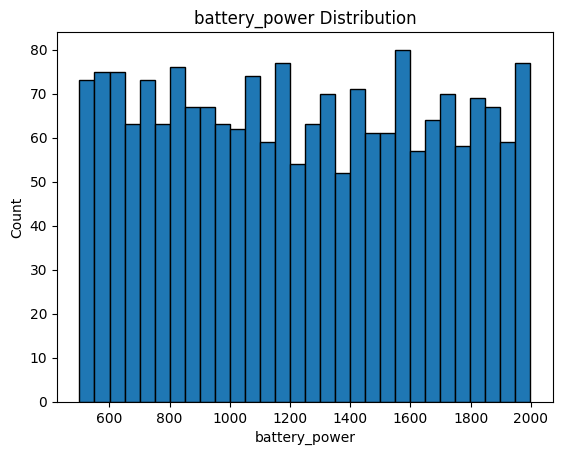

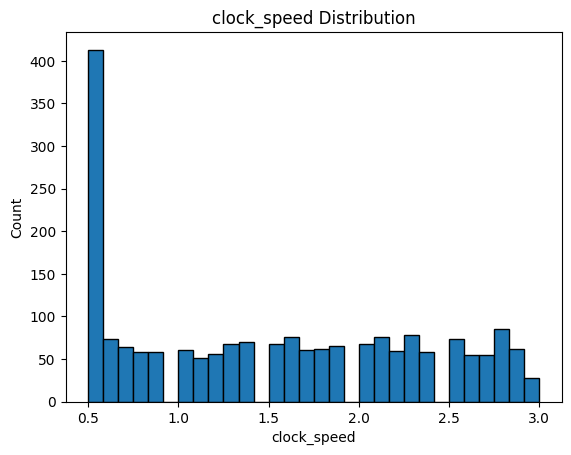

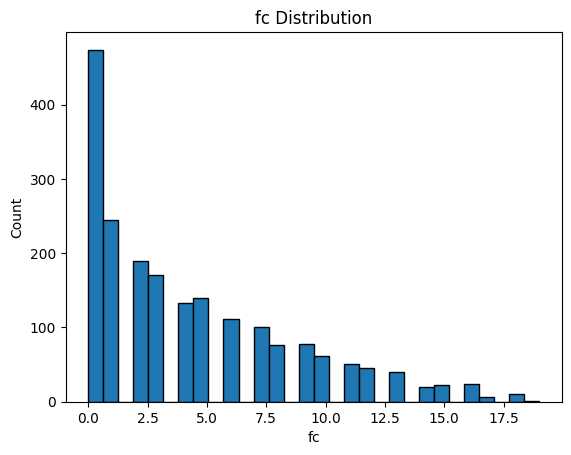

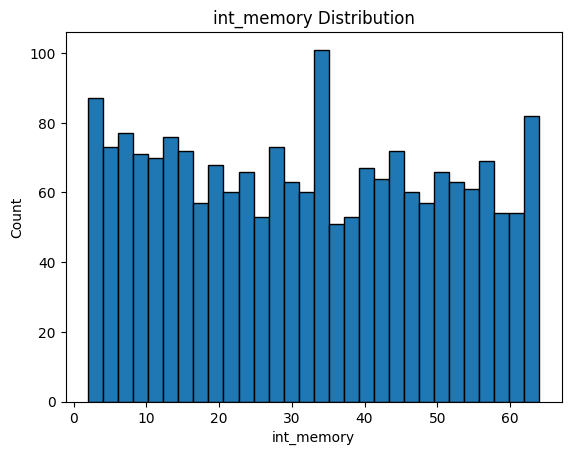

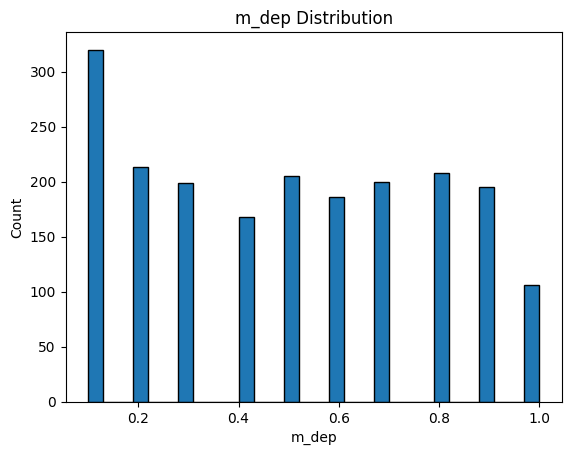

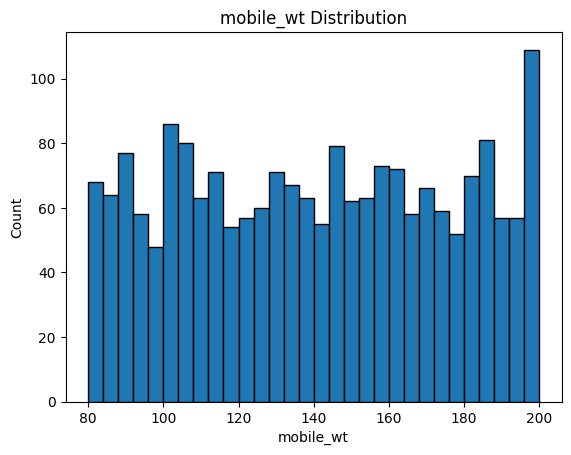

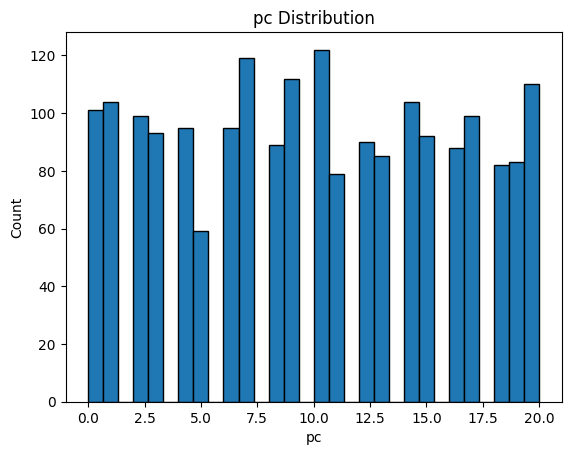

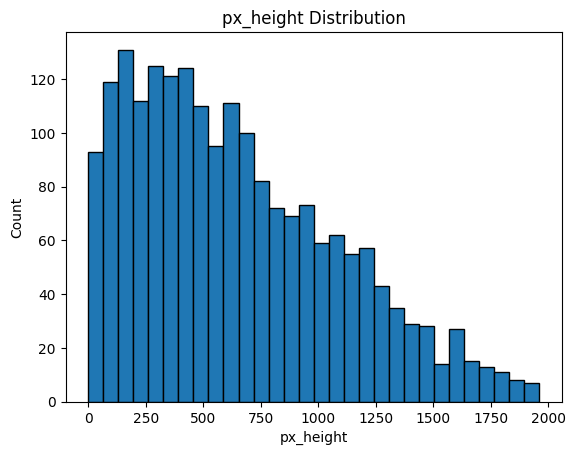

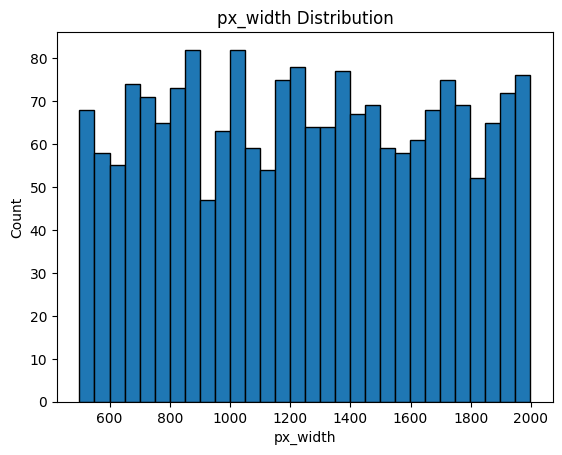

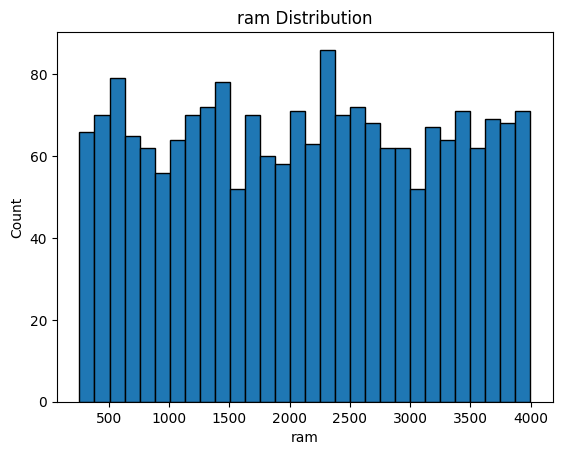

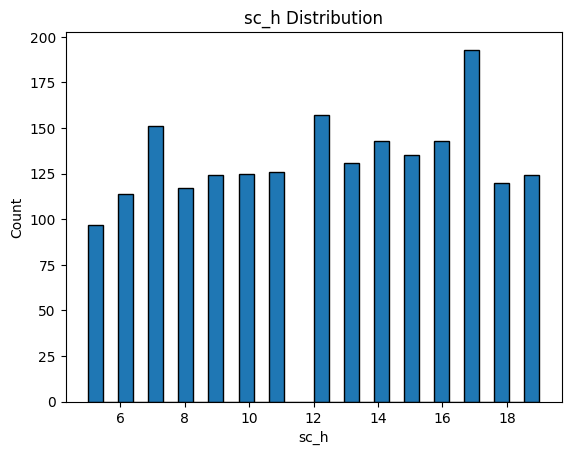

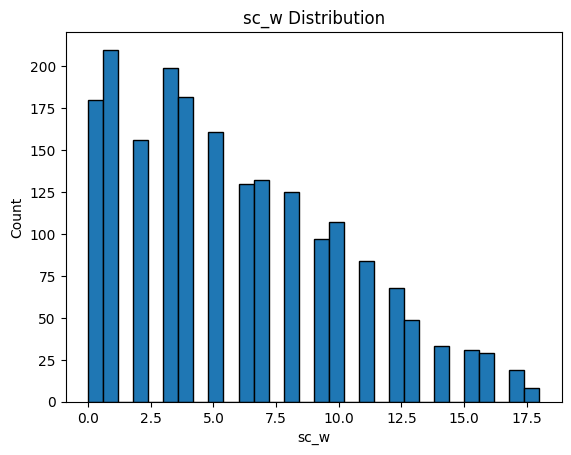

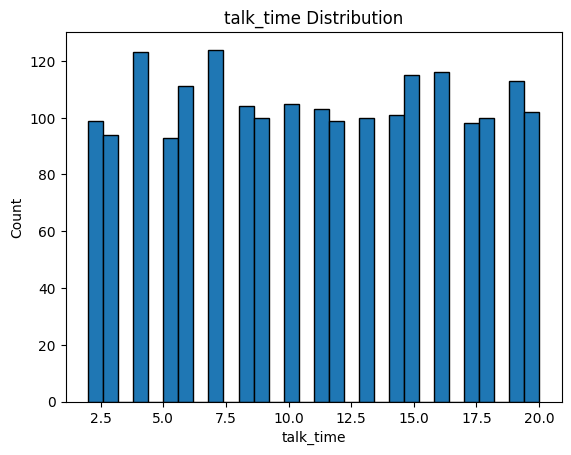

In [ ]:
df_cont = df.drop(columns=['blue', 'four_g', 'n_cores', 'three_g','touch_screen','wifi','dual_sim','price_range'], axis = 1)

for col in df_cont.columns:
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# **Como é um dataset com dados distruídos em treino e teste é condizente que as variáveis são tratadas e aprensentam boas distribuições.**

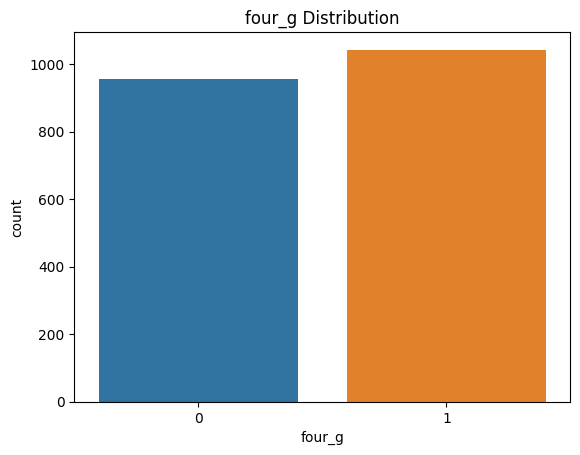

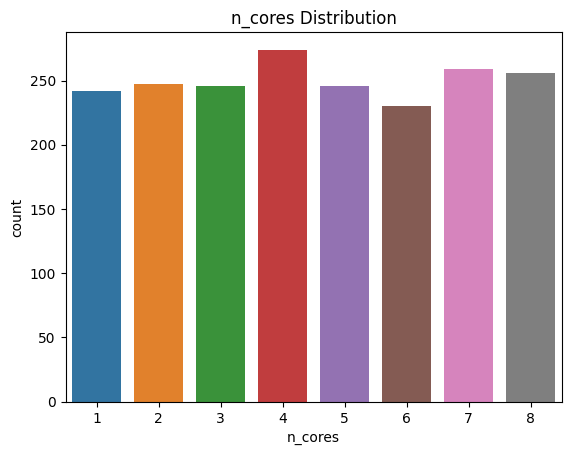

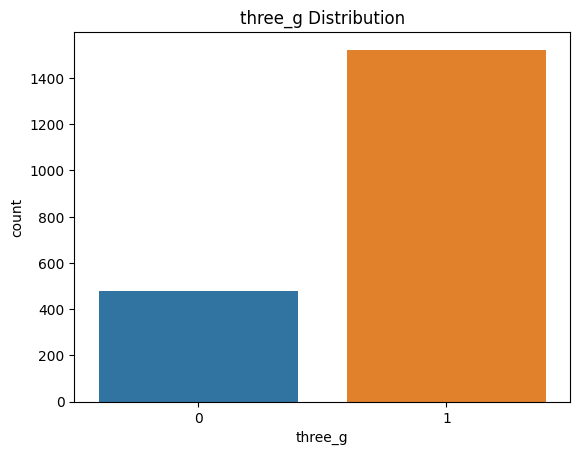

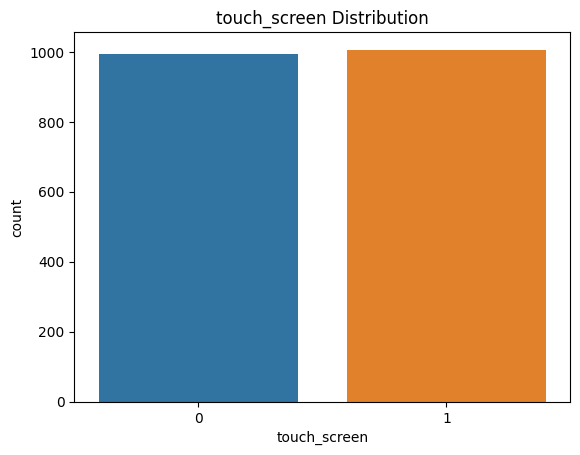

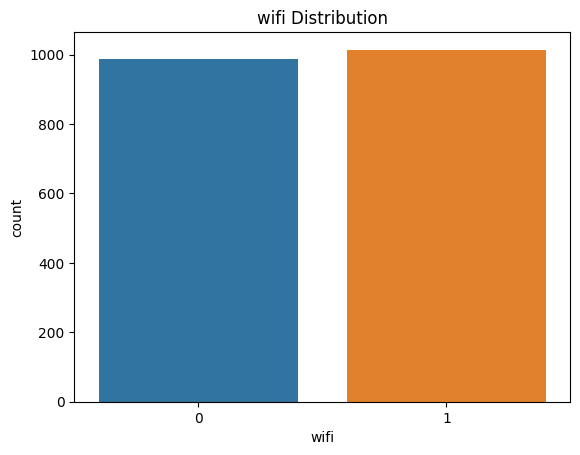

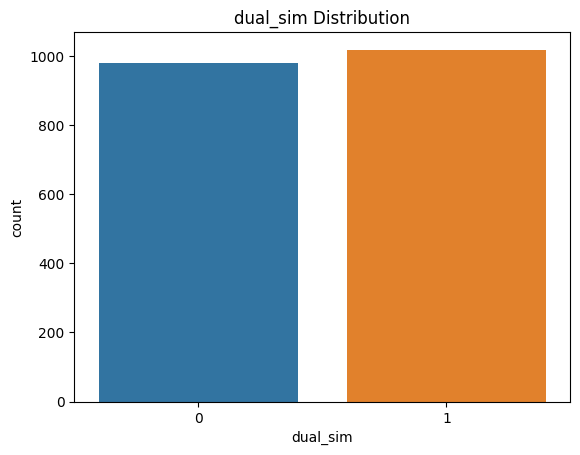

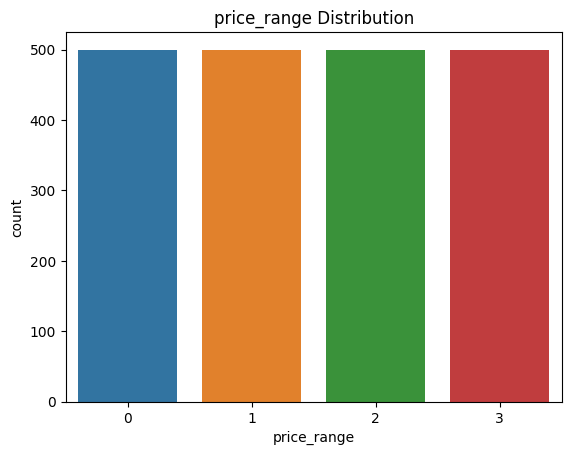

In [ ]:
for col in ['blue', 'four_g', 'n_cores', 'three_g','touch_screen','wifi','dual_sim', 'price_range']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

### **Não há muito segredo no plot das variáveis discretas, visto que condizem com a quantidade total de observações parecem ser consistentes.**

---



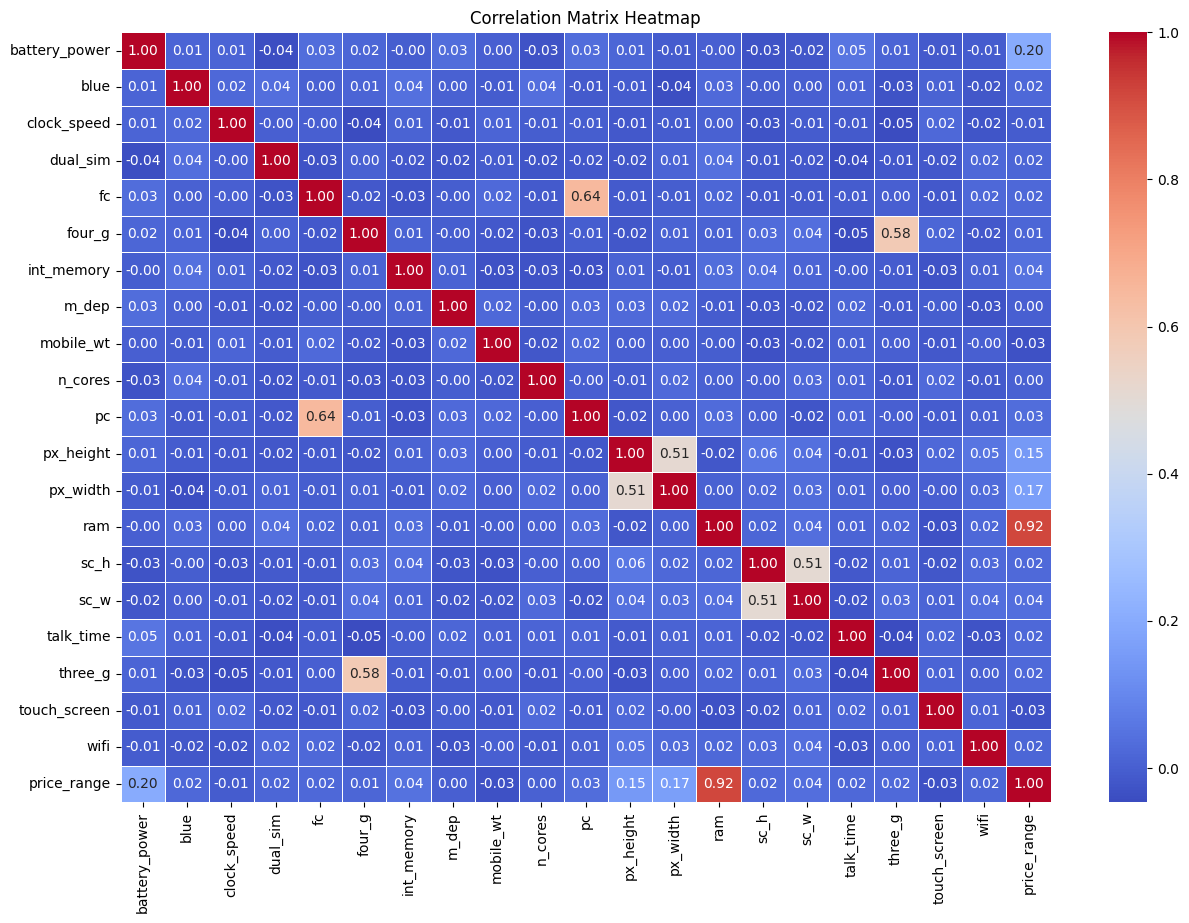

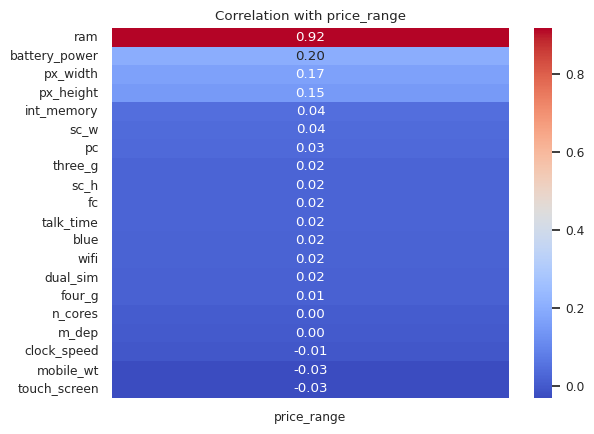

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = df.corr()
target_corr = corr['price_range'].drop('price_range')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with price_range')
plt.show()

A MATRIX DE CORRELAÇÃO NOS INDICA QUE A FEATURE QUE MAIS AFETA O PREÇO DOS CELULARES É A MEMÓRIA RAM, SEGUIDA DO TEMPO DE DURAÇÃO DA BATERIA. COMO NÃO TEMOS UMA ESTATÍSTICA MAIS FUNDAMENTADA NESSE MODELO, IREMOS ESTIMAR POR RANDOM FOREST CLASSIFICATOR SE É VÁLIDO OS PONTOS DE CORRELAÇÃO.

In [ ]:
#Creating the dependent variable class
factor = pd.factorize(df['price_range'])
df.price_ranges = factor[0]
definitions = factor[1]
print(df.head())
print(definitions)

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0         2.20         0   1       0           7   0.60   
1           1021     1         0.50         1   0       1          53   0.70   
2            563     1         0.50         1   2       1          41   0.90   
3            615     1         2.50         0   0       0          10   0.80   
4           1821     1         1.20         0  13       1          44   0.60   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [ ]:
#feature variables
X = df.drop('price_range',axis=1)

#target
y = df['price_range']

In [ ]:
import random
random.seed(123)

# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

CRIANDO UM MODELO DE RANDOM FOREST CALSSIFIER SEM O TESTE E AJUSTE DE HIPERPARAMETROS

PORCENTAGEM PARA TREINO 85% E 25% PARA TESTE

In [ ]:
random.seed(123)
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

<Axes: >

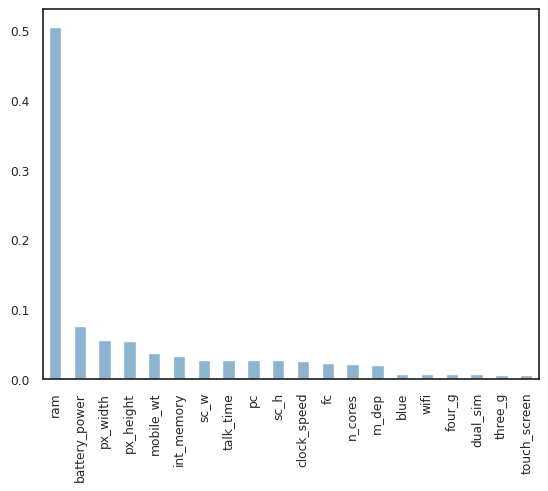

In [ ]:
random.seed(123)
importances = pd.Series(classifier.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot.bar()

NOSSO MODELO SEM HIPERPARAMETROS PARECE ESTAR CONDIZENTE COM AS PREMISSAS DA MATRIZ DE CORRELAÇÃO.

TEMOS A FEATURE MEMÓRIA RAM COM A IMPORTANCIA DE APROXIMADAMENTE 50% PARA O PREÇO DOS CELULARES.

EM SEGUIDA TEMOS O TEMPO DE DURAÇÃO DE BATERIA, COM UMA IMPORTANCIA MENOR (8%), MAS MESMO ASSIM RELEVANTE.

In [ ]:
random.seed(123)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
reversefactor = dict(zip(range(3),definitions))

y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual prices'], colnames=['Predicted prices']))

Predicted prices    1    2   3
Actual prices                 
1                 128   14   0
2                   4  111  11
3                   0   11  97


A MATRIX DE CONFUSÃO NOS DA BOAS PREVISÕES DE ASSERTIVIDADE PARA O MODELO.

                     Feature  Importance
ram                      ram        0.51
battery_power  battery_power        0.08
px_width            px_width        0.06
px_height          px_height        0.06
mobile_wt          mobile_wt        0.04
int_memory        int_memory        0.03
sc_w                    sc_w        0.03
talk_time          talk_time        0.03
pc                        pc        0.03
sc_h                    sc_h        0.03
clock_speed      clock_speed        0.03
fc                        fc        0.02
n_cores              n_cores        0.02
m_dep                  m_dep        0.02
blue                    blue        0.01
wifi                    wifi        0.01
four_g                four_g        0.01
dual_sim            dual_sim        0.01
three_g              three_g        0.01
touch_screen    touch_screen        0.01


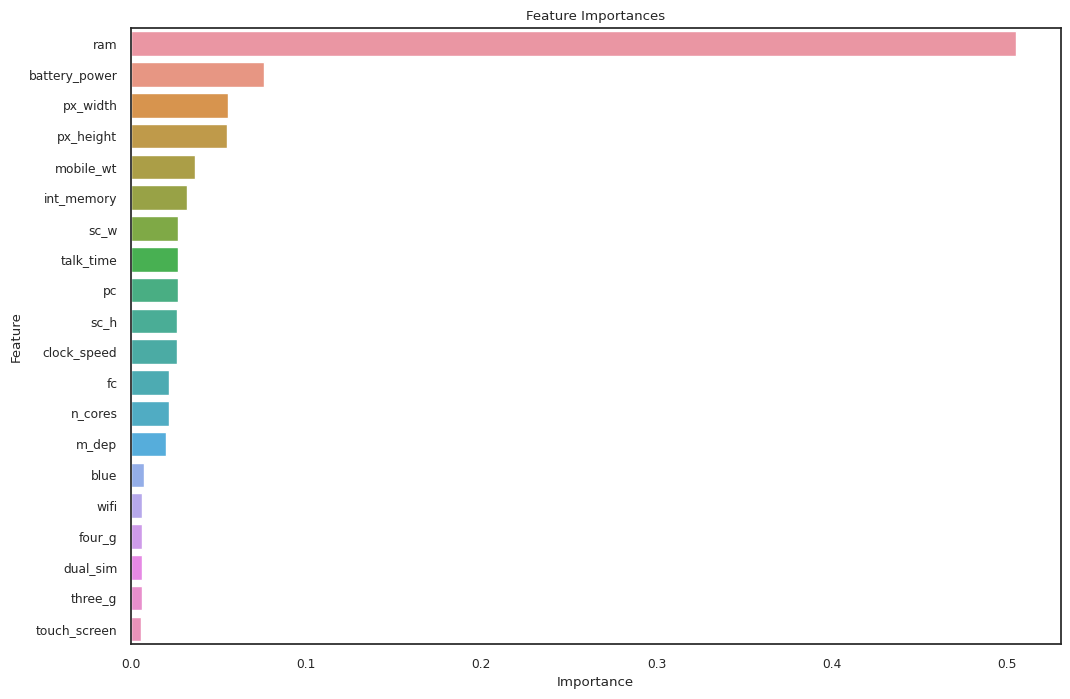

In [ ]:
random.seed(123)

features_names = ('battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi')
importance_df = pd.DataFrame({'Feature': features_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

In [ ]:
random.seed(123)

def RF(X,Y,m_depth):
    teste = []
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
    for i in m_depth:
        clf=RandomForestClassifier(n_estimators = 180, criterion = 'gini', random_state = 25)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        teste.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((X_train),y_train),
                           "Test_Score" : clf.score((X_test), y_test)}, name = i)))
    teste = pd.DataFrame(teste).T
    return teste

In [ ]:
random.seed(123)

model_accuracy1 = RF(X_train, y_train, np.arange(1,30))
print('Accuracy of RF:',model_accuracy1.loc['Accuracy',].max())
print(model_accuracy1.idxmax(axis=1))

Accuracy of RF: 0.8533333333333334
Precision      1
Recall         1
F1             1
Accuracy       1
Train_Score    1
Test_Score     1
dtype: int64


O MODELO SEM HIPERPARAMETROS ALEATÓRIOS NOS DA 85,53% DE ACURÁCIA, ACIMA DO QUE ESPERAMOS PARA O CLASSIFICADOR. ENTRETANTO, AS OUTRAS MÉTRICAS DE AVALIAÇÃO FICARAM BEM BAIXAS, PODENDO COMPROMETER CASO PRECISEMOS DE ATUALIZAÇÕES. O RECOMENDADO SERIA TESTAR OUTROS MODELOS DE CLASSIFICAÇÃO





NOVO CLASSIFICADOR - TESTANDO HYPERPARAMETROS


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
pprint('Parameters currently in use:\n')
pprint(rf.get_params())

'Parameters currently in use:\n'
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'n_estimators': [50, 66, 83, 100, 116, 133, 150, 166, 183, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 66, 83, 100, 116,
                                                         133, 150, 166, 183,
                                                         200]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 183,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

VAMOS TESTAR O MODELO COM OS MELHORES PARAMETROS ENCONTRADOS NO CLASSIFICADOR

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

base_model = RandomForestClassifier(n_estimators= 183,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features = 'auto',
 max_depth= None,
 bootstrap= True)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, y_train)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
Improvement of 0.00%.


OVERFITTING, PARECE RUIM.

AGORA, TESTANDO MELHORES PARAMETROS COM GRIDSEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 150, 200]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_train, y_train)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Model Performance
Average Error: 0.0020 degrees.
Accuracy = 99.78%.
Improvement of -0.22%.


PARECE MELHOR QUE O MODELO ANTERIOR, MAS MESMO ASSIM TEMOS UMA ALTA ACURACIA.

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 150}

TREINAREMOS O MODELO COM A NOVA PARAMETRIZAÇÃO ORIUNDA DO GRID SEARCH

In [ ]:
rf = RandomForestClassifier(bootstrap= True,
 max_depth =110,
 max_features= 3,
 min_samples_leaf= 3,
 min_samples_split= 12,
 n_estimators= 150)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=110, max_features=3, min_samples_leaf=3,
                       min_samples_split=12, n_estimators=150)

In [ ]:
random_accuracy = evaluate(rf, X_train, y_train)

Model Performance
Average Error: 0.0073 degrees.
Accuracy = 99.30%.


In [ ]:
def RF(X,Y,m_depth):
    teste = []
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
    for i in m_depth:
        clf=RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 42,min_samples_split = 12,
        min_samples_leaf= 3,
        max_features= 3,
        max_depth= 110,
        bootstrap= True)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        teste.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((X_train),y_train),
                           "Test_Score" : clf.score((X_test), y_test)}, name = i)))
    teste = pd.DataFrame(teste).T
    return teste

In [ ]:
model_accuracy = RF(X_train, y_train, np.arange(1,30))
print('Accuracy of RF:',model_accuracy .loc['Accuracy',].max())
print(model_accuracy.idxmax(axis=1))

Accuracy of RF: 0.8233333333333334
Precision      1
Recall         1
F1             1
Accuracy       1
Train_Score    1
Test_Score     1
dtype: int64


O MODELO COM A TUNAGEM DE HIPERPARAMETROS NOS DEU UMA ACURÁCIA BEM MENOR DO QUE O MODELO ANTERIOR, COM HIPERPARAMETROS ALEATÓRIOS. HÁ UM INDÍCIO DE QUE SERIA NECESSÁRIO TESTAR OUTROS CLASSIFICADORES PARA ESSA BASE, A FIM DE TESTAR UMA MELHOR ACURÁCIA, MAS PRINCIPALMENTE MELHORES MÉTRICAS EM GERAL.

# ***IMPLEMENTAÇÃO:***

---




# **O MODELO SERIA DISPONIBILIZADO A EMPRESA DE FORMA TRIMESTRAL. NÃO HÁ NECESSIDADE DE TREINAR O MODELO ONLINE, VISTO QUE OS APARELHOS NÃO ENTRAM NO MERCADO DIARIAMENTE OU NA MAIORIA MENSALMENTE. HÁ TAMBÉM A QUESTÃO DA ATUALIZAÇÃO DOS PREÇOS E SAZONALIDADE.**


# **APÓS O PRIMEIRO ANO DE APLICAÇÃO DO MODELO E TREINAMENTO, SERIA INTERESSANTE SE A EMPRESA FORNECESSE AS VENDAS JUNTO AS DATAS DE PRECIFICAÇÃO DOS APARELHOS. ASSIM PODERÍAMOS IMPLEMENTAR UMA ANÁLISE DE LOGS PARA VERIFICAR SE HÁ INFLUENCIA DE SAZONALIDADE NO PREÇO DOS APARELHOS EM DATAS COMEMORATIVAS.**

# **ESSA ATUALIZAÇÃO ESTARIA INCLUSA NA ESPECIFICAÇÃO DE OPERAÇÃO DO MODELO PARA A EMPRESA, CONSTITUINDO EM UMA POSSÍVEL MELHORIA DE LUCRO COM A NOVA ANÁLISE APÓS O PERÍODO PROPOSTO.**